# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import HouseholdSpecializationModelClass

# Question 1

**Explain how you solve the model**

In [4]:
model=HouseholdSpecializationModelClass()

c:\Users\emil0\Downloads\projects-2023-best-team\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1 - par.alpha) * HM**((par.sigma - 1) / par.sigma) + par.alpha * HF**((par.sigma - 1) / par.sigma))**(par.sigma / (par.sigma - 1))


[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


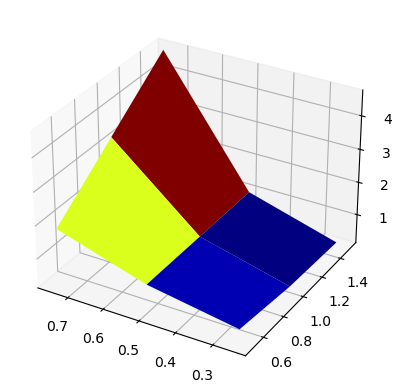

In [5]:
# First we create a 3x3 array filled with 0, to build on top of.
HFHM=np.zeros([3,3])
# We Define the values of alpha and sigma.
alpha_list = [0.25,0.5,0.75]
sigma_list = [0.5,1,1.5]
#In this loop we iterate over the values of alpha and sigma. We set alpha's and sigma's equal to the values in discrete model solution from householdspecialization. Finally we define the HF/HM.
for it, alpha in enumerate(alpha_list):
    for jt, sigma in enumerate(sigma_list):
        model.par.alpha=alpha
        model.par.sigma=sigma
        opt=model.solve_discrete()
        HFHM[it,jt]=opt.HF/opt.HM

print(HFHM)
# We create a meshgrid, where aplha and sigma repressent the x and y values respictively in the following plots.
alpha_list,sigma_list = np.meshgrid(alpha_list,sigma_list,indexing='ij')


# Standard code to create 3d plot.
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(alpha_list,sigma_list,HFHM,cmap=cm.jet)
ax.invert_xaxis()

# Question 2

Explain your code and procedure

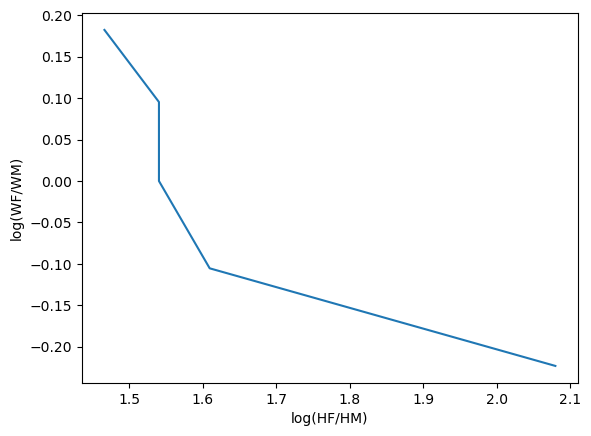

In [6]:
import numpy as np
#We define the 5 values that WF can take: 
WF_list = [0.8, 0.9, 1, 1.1, 1.2]
# Log transformation. WM is normalized to 1.
logWF = np.log(WF_list)
# We create another array filled with 0, which will be filled in in the next loop.
logHFHM = np.zeros(len(WF_list))
# Basically the same operation as in the q1 loop.
for it, alpha in enumerate(WF_list):
    model.par.wF = alpha
    opt = model.solve_discrete()
    logHFHM[it] = np.log(opt.HF / opt.HM)

plt.plot(logHFHM, logWF)
plt.ylabel('log(WF/WM)')
plt.xlabel('log(HF/HM)')
plt.show()

# Question 3

Explain your code and procedure

In [42]:
# Necessary? We reset the model parameters from the previous questions.
model.par.alpha = 0.5
model.par.alpha = 1

In [9]:
# Necessary? Quick overview of solve_wF_vec() from the other file.
model.solve_wF_vec

<bound method HouseholdSpecializationModelClass.solve_wF_vec of <inauguralproject.HouseholdSpecializationModelClass object at 0x0000023FC868E850>>

In [10]:
# Do you agree that this whole box is actually unecessary?
WF_list = [0.8, 0.9, 1, 1.1, 1.2]
logWF = np.log(WF_list)
logHFHM = np.zeros(len(WF_list))
for it, alpha in enumerate(WF_list):
    model.par.wF = alpha
    opt = model.solve_wF_vec()
    logHFHM[it] = np.log(opt.HF_vec/opt.HM)

AttributeError: 'NoneType' object has no attribute 'HF_vec'

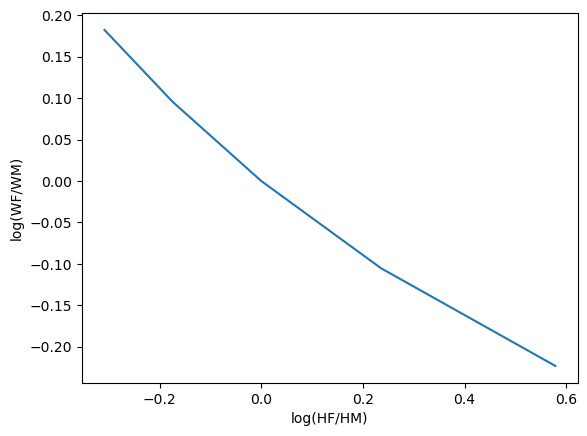

In [5]:
# Lucas here: I think this box is a sufficient answer. Most of the answer of the actual coding is done in the pyfile.
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
model.solve_wF_vec()
WF_list = [0.8, 0.9, 1, 1.1, 1.2]
logWF = np.log(WF_list)
logHFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)
plt.plot(logHFHM, logWF)
plt.ylabel('log(WF/WM)')
plt.xlabel('log(HF/HM)')
plt.show()

ADD CONCISE CONLUSION.